https://www.kaggle.com/rmisra/news-category-dataset

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud, STOPWORDS

from tqdm.auto import tqdm
tqdm.pandas()

pd.options.display.max_colwidth = None

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_json('../data/News_Category_Dataset_v2.json', lines=True)
print(data.shape)
data.head()

(200853, 6)


,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


# EDA

## Dropping Irrelvant Data

In [3]:
data = data.drop(['authors', 'date', 'link'], axis=1)
data.head()

,category,headline,short_description
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",She left her husband. He killed their children. Just another day in America.
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


## News Categories and their counts

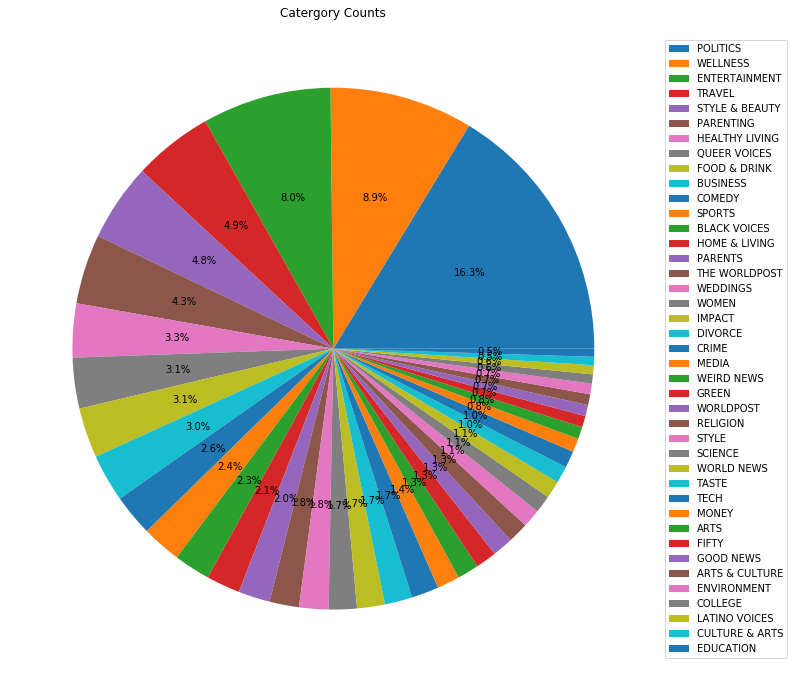

In [4]:
plotdata = data['category'].value_counts()
fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))
ax.pie(plotdata, autopct='%1.1f%%')
ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Catergory Counts")
plt.show()

## Generalising the categories

In [5]:
print(plotdata.index,len(plotdata.index))

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING',
       'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'IMPACT', 'DIVORCE',
       'CRIME', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION',
       'STYLE', 'SCIENCE', 'WORLD NEWS', 'TASTE', 'TECH', 'MONEY', 'ARTS',
       'FIFTY', 'GOOD NEWS', 'ARTS & CULTURE', 'ENVIRONMENT', 'COLLEGE',
       'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION'],
      dtype='object') 41


In [6]:
def generalize(x):
    if x in ['BUSINESS', 'MONEY']:
        return 'BUSINESS'
    if x in ['SCIENCE', 'TECH', 'ARTS', 'ARTS & CULTURE', 'COLLEGE', 'CULTURE & ARTS', 'EDUCATION']:
        return 'EDUCATION'
    if x in ['WELLNESS', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'HOME & LIVING', 'FOOD & DRINK', 'PARENTS', 'WEDDINGS', 'WOMEN', 'DIVORCE', 'RELIGION', 'STYLE', 'TASTE', 'FIFTY']:
        return 'LIFESTYLE'
    if x in ['QUEER VOICES', 'BLACK VOICES', 'THE WORLDPOST', 'WORLDPOST', 'WORLD NEWS', 'LATINO VOICES', 'IMPACT', 'MEDIA']:
        return 'GLOBAL'
    if x in ['COMEDY', 'CRIME', 'WEIRD NEWS', 'GREEN', 'GOOD NEWS', 'ENVIRONMENT']:
        return 'MISCELLANEOUS'
    else:
        return x

In [7]:
data['category'] = data['category'].progress_apply(generalize)

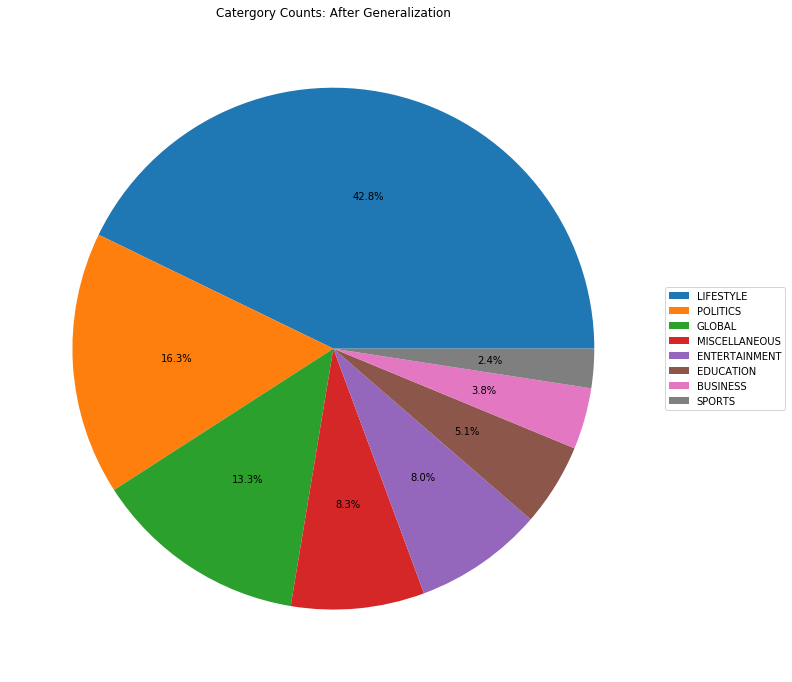

In [8]:
plotdata = data['category'].value_counts()
fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))
ax.pie(plotdata, autopct='%1.1f%%')
ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Catergory Counts: After Generalization")
plt.show()

In [9]:
labels = ['LIFESTYLE', 'POLITICS', 'GLOBAL', 'MISCELLANEOUS', 'ENTERTAINMENT', 'EDUCATION', 
                         'BUSINESS', 'SPORTS']

## Visualizing most common words

In [10]:
data['article'] = data['headline'] + ' ' + data['short_description']
data.drop(['headline', 'short_description'], axis=1, inplace=True)

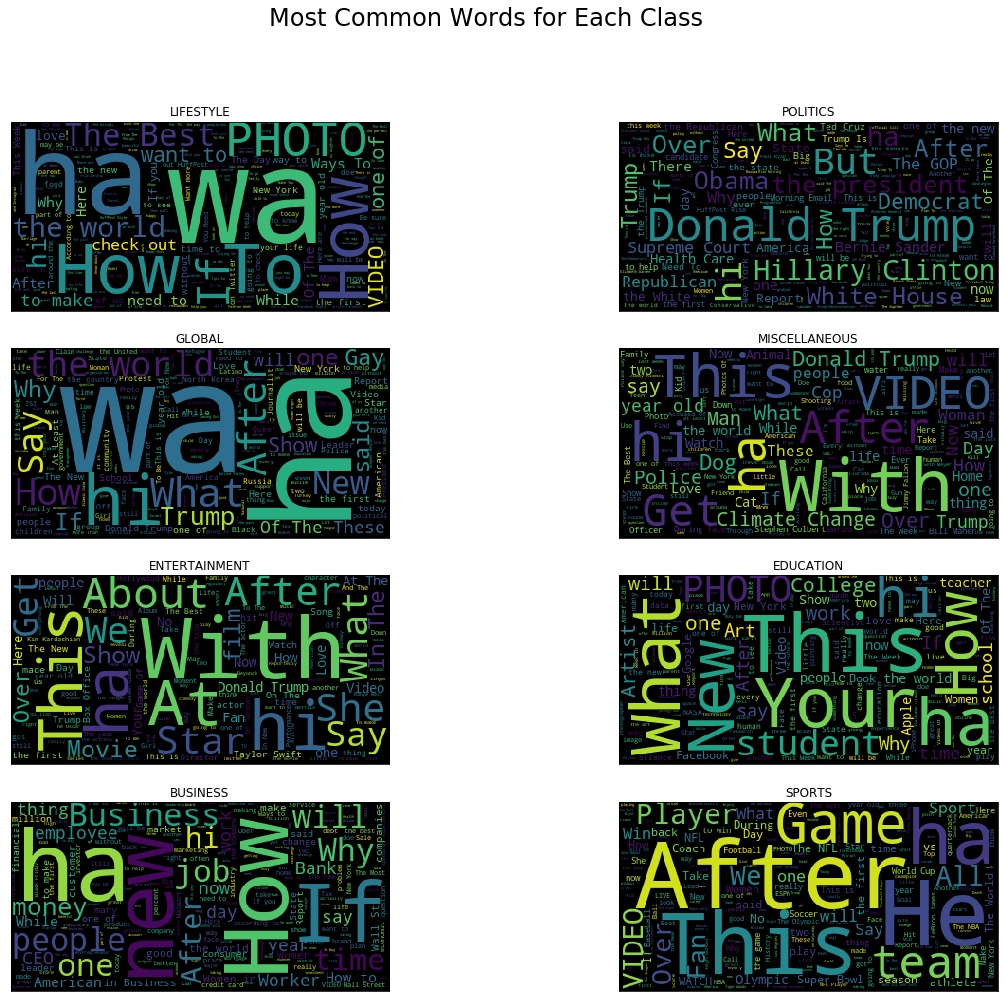

In [11]:
axes = []
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Most Common Words for Each Class', fontsize=24)
for i in range(8):
    axes.append(plt.subplot2grid((4, 2), (i//2, i%2)))
    
for i, col in enumerate(labels):
    axes[i].imshow(WordCloud().generate_from_text(' '.join(data[data['category'] == col]['article'].values)))
    axes[i].set_title(col)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

## Text Cleaning

In [12]:
import sys
sys.path.append('../')

from utils.text import TextCleaner

In [13]:
cleaner = TextCleaner()
data['article_clean'] = cleaner.fit_transform(data['article'].values)
data.head()

,category,article,article_clean
0,MISCELLANEOUS,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.",mass shooting texas last week left husband killed child another day america
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song.,smith join diplo nicky jam world cup official song course song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,hugh grant marries first time age actor longtime girlfriend anna eberstein tied knot civil ceremony
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,jim carrey blast castrato adam schiff democrat new artwork actor give dems as kicking fighting hard enough donald trump
4,ENTERTAINMENT,"Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",julianna margulies us donald trump poop bag pick dog dietland actress said using bag really cathartic therapeutic moment


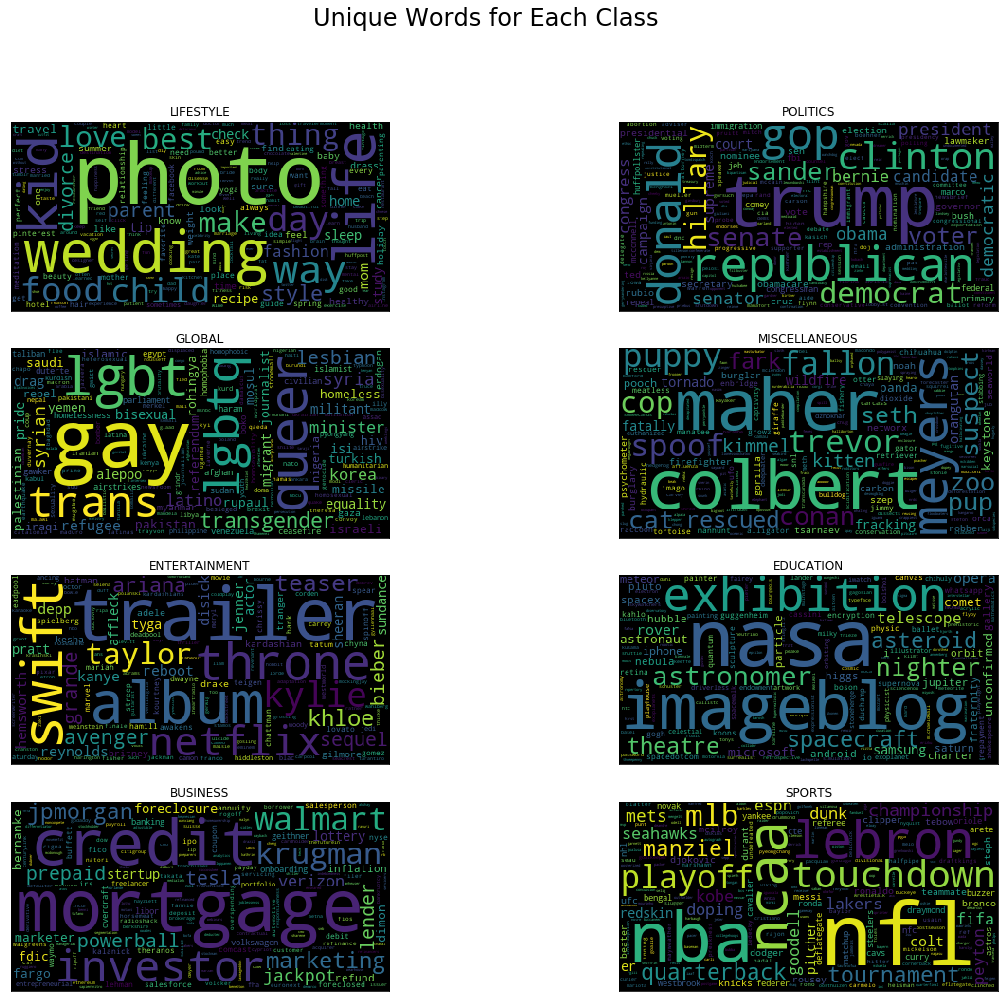

In [14]:
axes = []
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Unique Words for Each Class', fontsize=24)
for i in range(8):
    axes.append(plt.subplot2grid((4, 2), (i//2, i%2)))
    
for i, col in enumerate(labels):
    u = Counter(' '.join(data[data['category'] != col]['article_clean'].values).split())
    a = Counter(' '.join(data[data['category'] == col]['article_clean'].values).split())
    axes[i].imshow(WordCloud().generate_from_frequencies(a-u))
    axes[i].set_title(col)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

## TFIDF Vectorization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data['article_clean'])
X = vectorizer.transform(data['article_clean'])

In [17]:
encoder = LabelEncoder()
encoder.fit(data['category'])
y = encoder.transform(data['category'])

In [18]:
encoder.classes_

array(['BUSINESS', 'EDUCATION', 'ENTERTAINMENT', 'GLOBAL', 'LIFESTYLE',
       'MISCELLANEOUS', 'POLITICS', 'SPORTS'], dtype=object)

In [19]:
print("X shape:", X.shape, "Y shape: ", y.shape)

X shape: (200853, 75796) Y shape:  (200853,)


In [20]:
from scipy.sparse import save_npz

save_npz('../data/X1.npz', X)
np.save('../data/y1.npy', y)